In [1]:
from sklearn import datasets

In [2]:
import numpy as np

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:,[2, 3]]
y = iris.target
print("Class labels:" , np.unique(y))

Class labels: [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size= 0.3, random_state = 1, stratify = y)

In [7]:
print("labels counts in y:" , np.bincount(y))

labels counts in y: [50 50 50]


In [8]:
print("labels counts in y_train:",  np.bincount(y_train))

labels counts in y_train: [35 35 35]


In [9]:
print("labels counts in y_test:",np.bincount(y_test ))

labels counts in y_test: [15 15 15]


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_train_std= sc.transform(X_train)

In [14]:
X_test_std= sc.transform(X_test)

In [15]:
from sklearn.linear_model import Perceptron

In [16]:
ppn = Perceptron(max_iter=40,eta0=0.1, random_state=0)

In [17]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
y_pred = ppn.predict(X_test_std)

In [19]:
print("MIsclassified samples: %d" % (y_test != y_pred).sum())

MIsclassified samples: 3


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print("Accuracy: %.2f" % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [27]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [28]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    markers = ("s", "x","o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() +1
    x2_min , x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[ y== cl,1],
                            alpha = 0.8, c = colors[idx], marker = markers[idx], 
                            label= cl, edgecolor = "black")
    
    if test_idx:
        
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c= "", edgecolors="black", alpha= 1.0, linewidth = 1,
                            marker = "o", s = 100 , label = "test set")

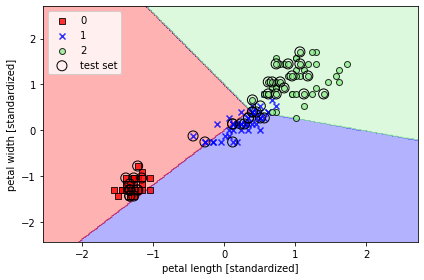

In [30]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx = range(105,150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()